## The k-armed Bandit Problem

### University of Virginia
### Reinforcement Learning
#### Last updated: August 21, 2023

---


### SOURCES 

Reinforcement Learning, RS Sutton & AG Barto, 2nd edition. Chapter 2

### LEARNING OUTCOMES

- Understand the k-armed bandit problem
- Simulate a k-armed bandit problem with $\epsilon$-greedy actions
- Understand how using $\epsilon$-greedy actions can improve the policy
- Explain how different factors affect Upper-Confidence-Bound action selection


### CONCEPTS

- k-armed bandit problem
- simulation to measure value function
- $\epsilon$-greedy actions can improve policy
- Upper-Confidence-Bound action selection

### Introducing the k-armed Bandit Problem



![k_armed_bandit](./k_armed_bandit.jpg)

RL evaluates the actions taken rather than providing the correct actions to the agent.  
This distinguished RL from other types of learning.  

k-armed bandit problems are important and illustrate key ideas.  
They include the class of problems using one state.  
Contextual bandit problems allow for different states.

**The problem**

Imagine a slot machine with *k* arms, possibly with different values.  
At each step, you pull an arm (the action) and receive the reward.  
Assume stationarity: the rewards don't change over time.  
Objective: maximize the expected discounted total reward over a horizon.

Examples:
- selecting between different investment opportunities
- a doctor selects between different treatment options
- a family tries to discover the best Chinese restaurant in town

**Value of an action**

Each action results in a reward, and we can think about mean reward: the action's *value*

Value of action *a* denoted $q_*(a) = E[R_t | A_t=a]$  

This is expected reward given action *a* is selected

This quantity is typically unknown and must be estimated empirically

$Q_t(a)$ denotes the estimated value of action $a$ at time $t$


**Exploration vs Exploitation and Greedy Actions**

Getting a good estimate means repeatedly trying the actions.

For actions with large variance, more sampling is required to accurately measure $q_*(a)$

One action will be best or there will be a tie. Selecting the action with highest $Q_t(a)$ is the greedy action.

If we are too greedy, we might not discover the best action.

Balancing exploration and exploition depends on value estimates, uncertainties, and number of remaining steps.

**Action-value Methods**

Measure the action value of $a$ as the mean reward when $a$ is taken: 

$Q_t(a) = \frac{\sum_{i=1}^{t-1}R_i \cdot \unicode{x1D7D9}_{A_i=a}}{\sum_{i=1}^{t-1} \unicode{x1D7D9}_{A_i=a}}$

By the law of large numbers, $Q_t(a)$ converges to $q_*(a)$ for sufficiently large *t*

Simplest policy: select action with highest $Q_t$

$A_t=\underset{a}{\operatorname{\arg max}} Q_t(a)$

This is the greedy action; it is generally better to balance with exploring, so $\epsilon$-greedy methods may work better

**Incremental Implementation**

Want to produce a scalable way to compute $Q_t$ that doesn't require storing all rewards.  

$
\begin{aligned}  
Q_{n+1} &= \frac{1}{n} \sum_{i=1}^{n}R_i \\
&= \frac{1}{n} (R_n + \sum_{i=1}^{n-1}R_i) \\
&= Q_n + \frac{1}{n}(R_n - Q_n) \\
\end{aligned}
$

See Sutton & Barto for details

Notice this involves storing two things (and not all the rewards): prior value estimate $Q_n$ and number of time steps $n$

This is an important update pattern: 

**new estimate = old estimate + step_size * (new reward - old estimate)** 

The term (new reward - old estimate) is an error estimate

If new reward = old estimate, then update is unnecessary

**Bandit Example**

Below we set up a 4-armed bandit where each arm follows normal distribution with different mean, standard deviation.  
Note the first arm has highest mean and also highest standard deviation.  
The second arm might be mistaken for highest-valued arm as it has much lower standard deviation with slightly lower mean.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random

In [2]:
def bandit_one_draw():
    arm = np.zeros(4)
    arm[0] = np.random.normal(10,10)
    arm[1] = np.random.normal(9.5,1)
    arm[2] = np.random.normal(1,1)
    arm[3] = np.random.normal(0.5,1)
    return arm

Produce one draw from each arm:

In [4]:
bandit_one_draw()

array([23.16024889,  8.55066911,  1.7796044 ,  2.37498721])

**Exercise 1a**  
Write simulation code to implement k-armed bandit using the incremental update equation.   
This should include:
- Writing and calling a method to use $\epsilon$-greedy actions  
- Using a loop
- Calling `bandit_one_draw()`  
- Setting k=4, iterations = 100, $\epsilon$=0.1
- Inside the loop, print Q, the value estimates for each state. This will show the evolution through time.

Does your simulation identify the first state as highest valued? What happens to your result if iterations = 10?

In [13]:
# solution
k = 4
iterations = 10000
epsilon = 0.1

Q = np.zeros(k)
N = np.zeros(k)

def act(epsilon, action_values):
    action_size = len(action_values)
    if np.random.rand() <= epsilon: # random draw with prob epsilon
        return random.randrange(action_size)
    return np.argmax(action_values)  # returns action

results = np.empty((iterations, k))

for it in range(iterations):
    A = act(epsilon, Q)
    draw = bandit_one_draw()
    R = draw[A]
    N[A] = N[A] + 1
    Q[A] = Q[A] + (1/N[A]) * (R - Q[A])
    print(Q)
    results[it,:] = Q

[18.94528179  0.          0.          0.        ]
[14.32302772  0.          0.          0.        ]
[14.32302772  0.         -0.48668099  0.        ]
[15.1573757   0.         -0.48668099  0.        ]
[18.7888884   0.         -0.48668099  0.        ]
[18.6197835   0.         -0.48668099  0.        ]
[17.66191696  0.         -0.48668099  0.        ]
[14.47107846  0.         -0.48668099  0.        ]
[13.27596086  0.         -0.48668099  0.        ]
[12.61087534  0.         -0.48668099  0.        ]
[12.59818494  0.         -0.48668099  0.        ]
[11.87986332  0.         -0.48668099  0.        ]
[10.68980627  0.         -0.48668099  0.        ]
[ 9.04488382  0.         -0.48668099  0.        ]
[ 8.17019014  0.         -0.48668099  0.        ]
[ 8.76908706  0.         -0.48668099  0.        ]
[ 8.73850221  0.         -0.48668099  0.        ]
[ 9.76661013  0.         -0.48668099  0.        ]
[ 9.56930005  0.         -0.48668099  0.        ]
[ 9.2067742   0.         -0.48668099  0.        ]


**Exercise 1b**  
Modify your code from exercise 1a to store the Q values into an array.  
The rows represent time steps, the columns represent actions.  
Plot the Q values to show the evolution of the values over time for each action.  
Include a legend to identify the actions.

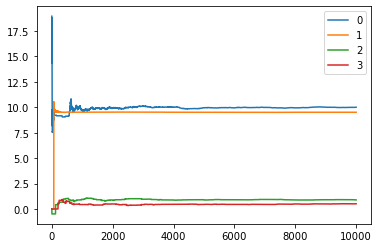

In [15]:
plt.plot(results)
plt.legend(['0','1','2','3'])
plt.show()

**Upper-Confidence-Bound Action Selection**

We studied greedy policy

$A_t=\underset{a}{\operatorname{\arg max}} Q_t(a)$

and the $\epsilon$-greedy policy

Can be useful to consider actions which may be promising (or avoid uncertain actions)

*Upper-Confidence-Bound (UCB) action selection* can be useful here.

The approach (below) accounts for variance in estimate of *a*, which appears under square root.

Full term in parenthesis is an upper bound on true value of *a*

Here, *c* is confidence level term. $N_t(a)$ is number of times *a* is selected. *t* is number of trials.

![ucb](./ucb.png)

**Exercise 2a**  
What happens to the upper bound as the number of times *a* is selected increases?

As $a$ is selected, $N_t(a)$ will increase and this will lower the standard deviation and the upper bound.

**Exercise 2b**  
What happens to the upper bound as the number of times that other actions besides *a* is selected increases?

Since action $a$ is not selected, $t$ will increase but $N_t(a)$ will not. The standard deviation and the upper bound will increase. The increases will get smaller over time due to the $ln()$ function.